/var/folders/9v/jcfdtcks4gqcxnckv1507c100000gn/T/ipykernel_4906/2244847530.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(list(tickers.values()), period='60d', interval='1d')['Close']
[*********************100%***********************]  12 of 12 completed

1 Failed download:
['MATIC-USD']: YFPricesMissingError('possibly delisted; no price data found  (period=60d)')


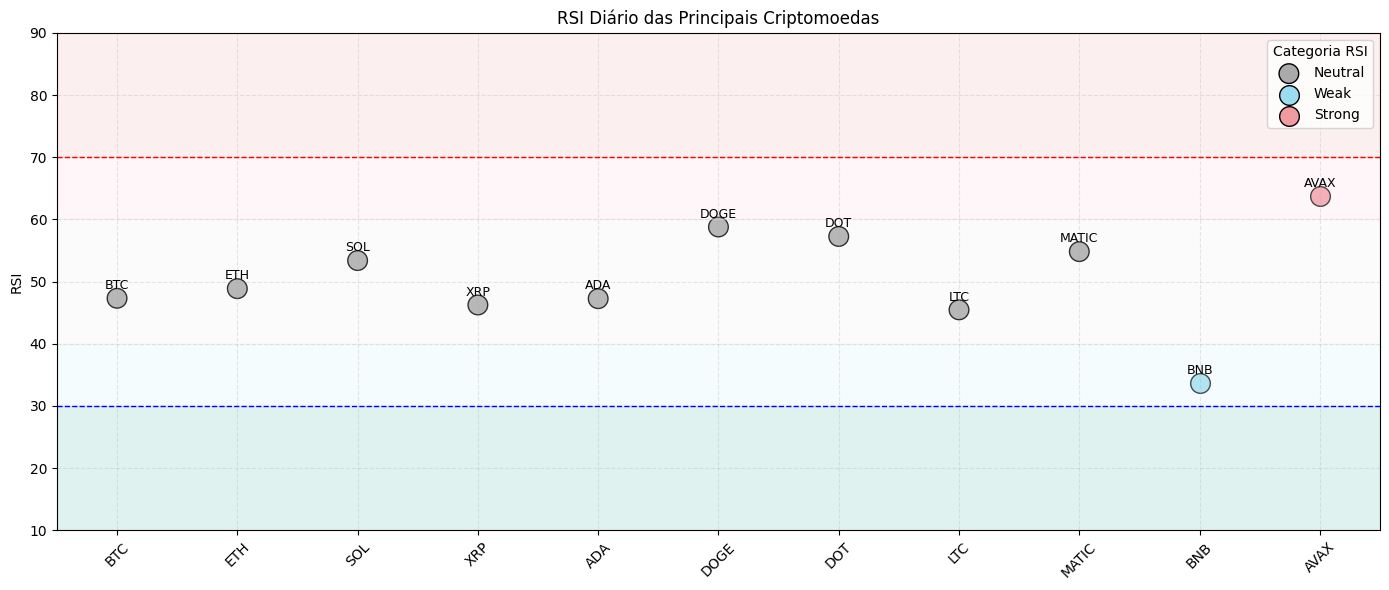

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def calcular_rsi(close, period=14):
    delta = close.diff()
    gain = delta.where(delta > 0, 0.0)
    loss = -delta.where(delta < 0, 0.0)
    avg_gain = gain.rolling(window=period, min_periods=period).mean()
    avg_loss = loss.rolling(window=period, min_periods=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

tickers = {
    'BTC': 'BTC-USD',
    'ETH': 'ETH-USD',
    'SOL': 'SOL-USD',
    'BNB': 'BNB-USD',
    'XRP': 'XRP-USD',
    'ADA': 'ADA-USD',
    'DOGE': 'DOGE-USD',
    'DOT': 'DOT-USD',
    'AVAX': 'AVAX-USD',
    'LINK': 'LINK-USD',
    'LTC': 'LTC-USD',
    'MATIC': 'MATIC-USD'
}

dados = yf.download(list(tickers.values()), period='60d', interval='1d')['Close']
dados.columns = tickers.keys()
dados.dropna(axis=1, how='all', inplace=True)

rsi_atual = {}
for cripto in dados.columns:
    rsi = calcular_rsi(dados[cripto])
    rsi_atual[cripto] = rsi.dropna().iloc[-1]

df_rsi = pd.DataFrame.from_dict(rsi_atual, orient='index', columns=['RSI'])
df_rsi['Categoria'] = pd.cut(
    df_rsi['RSI'],
    bins=[-1, 30, 40, 60, 70, 100],
    labels=['Oversold', 'Weak', 'Neutral', 'Strong', 'Overbought']
)

cores = {
    'Oversold': '#2ca6a4',
    'Weak': '#9cdcf0',
    'Neutral': '#aaaaaa',
    'Strong': '#f19aa0',
    'Overbought': '#d60000'
}

df_rsi['Cor'] = df_rsi['Categoria'].map(cores)

plt.figure(figsize=(14, 6))

for categoria in df_rsi['Categoria'].unique():
    subset = df_rsi[df_rsi['Categoria'] == categoria]
    plt.scatter(
        subset.index, subset['RSI'],
        color=subset['Cor'],
        s=200, label=categoria,
        edgecolor='black'
    )

for i, row in df_rsi.iterrows():
    plt.text(i, row['RSI'] + 1.5, i, ha='center', fontsize=9)

plt.axhspan(70, 100, color='#f8d7da', alpha=0.4)
plt.axhspan(60, 70, color='#fce4ec', alpha=0.3)
plt.axhspan(40, 60, color='#eeeeee', alpha=0.2)
plt.axhspan(30, 40, color='#e0f7fa', alpha=0.3)
plt.axhspan(0, 30, color='#b2dfdb', alpha=0.4)

plt.title('RSI Diário das Principais Criptomoedas')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.ylim(10, 90)
plt.axhline(70, linestyle='--', color='red', linewidth=1)
plt.axhline(30, linestyle='--', color='blue', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(title='Categoria RSI')
plt.tight_layout()
plt.show()
